In [ ]:
#                                        Dubreil-Jacotin-Long (DJL)

In [ ]:
#                                             S. Maishal                                                          11-04-2024

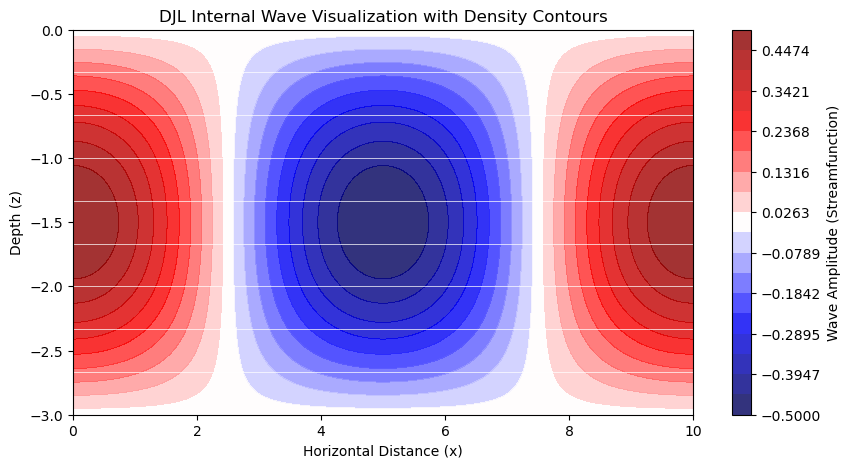

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set parameters for the wave and stratification
Lx, Lz = 10, 3      # domain size in x and z
nx, nz = 200, 100   # number of grid points in x and z
x = np.linspace(0, Lx, nx)
z = np.linspace(-Lz, 0, nz)
X, Z = np.meshgrid(x, z)

# Wave parameters
A = 0.5            # amplitude of the wave
kx = 2 * np.pi / Lx  # wavenumber in x
lz = np.pi / Lz    # vertical mode

# Density stratification and buoyancy frequency
rho_0 = 1025  # reference density in kg/m^3
N0 = 0.02     # buoyancy frequency (s^-1)
rho = rho_0 * (1 - N0**2 * Z / 9.81)

# Define wave streamfunction psi (representing the DJL wave)
psi = A * np.cos(kx * X) * np.sin(lz * (Z + Lz))

# Visualize the wave and density contours
plt.figure(figsize=(10, 5))
cmap = plt.get_cmap("seismic")

# Plotting the amplitude of the wave with density contours
contour_levels = np.linspace(-A, A, 20)
density_contours = np.linspace(np.min(rho), np.max(rho), 10)

# Plot streamfunction representing wave amplitude
plt.contourf(X, Z, psi, levels=contour_levels, cmap=cmap, alpha=0.8)
cbar = plt.colorbar(label="Wave Amplitude (Streamfunction)")

# Overlay density contours
plt.contour(X, Z, rho, levels=density_contours, colors='white', linewidths=0.5)

# Customize plot
plt.xlabel("Horizontal Distance (x)")
plt.ylabel("Depth (z)")
plt.title("DJL Internal Wave Visualization with Density Contours")
plt.show()


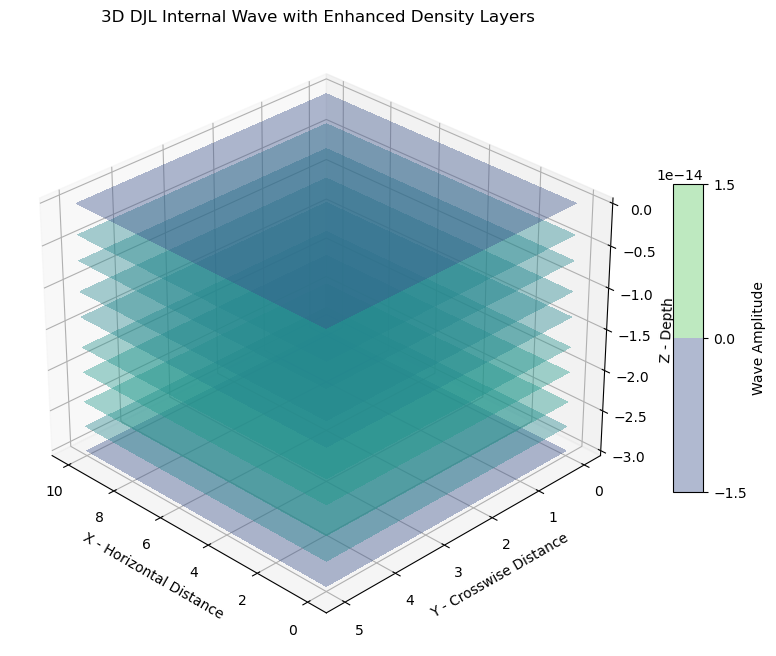

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up parameters
Lx, Ly, Lz = 10, 5, 3          # Dimensions in x, y, z
nx, ny, nz = 100, 50, 50       # Grid points in x, y, z
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters
A = 0.5                        # Wave amplitude
kx = 2 * np.pi / Lx            # Wavenumber in x
ky = 2 * np.pi / Ly            # Wavenumber in y
lz = np.pi / Lz                # Vertical wave mode

# Density stratification (e.g., ocean stratification profile)
rho_0 = 1025                   # Reference density (kg/m³)
N0 = 0.02                      # Buoyancy frequency
rho = rho_0 * (1 - N0**2 * Z / 9.81)

# Streamfunction of the DJL wave
psi = A * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Visualization in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap("viridis")

# Loop through selected z-levels for layered contours
num_slices = 10  # Adjust for more layers if desired
indices = np.linspace(0, nz-1, num_slices).astype(int)
for i in indices:
    # 3D contour of wave amplitude at different Z levels
    cont = ax.contourf(X[:, :, i], Y[:, :, i], Z[:, :, i], 
                       zdir='z', offset=z[i], levels=15, cmap=cmap, alpha=0.4)
    
    # Overlay density contours on wave amplitude
    density_levels = np.linspace(np.min(rho), np.max(rho), 6)
    ax.contour(X[:, :, i], Y[:, :, i], Z[:, :, i], zdir='z', offset=z[i],
               levels=density_levels, colors='white', linewidths=0.5, alpha=0.7)

# Set viewing angle and labels
ax.view_init(elev=30, azim=135)
ax.set_xlabel("X - Horizontal Distance")
ax.set_ylabel("Y - Crosswise Distance")
ax.set_zlabel("Z - Depth")
ax.set_title("3D DJL Internal Wave with Enhanced Density Layers")

plt.colorbar(cont, ax=ax, shrink=0.5, aspect=10, label="Wave Amplitude")
plt.show()


In [7]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs, colors = [x0], [y0], [z0], []
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            colors.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines',
            line=dict(color=colors, width=2, colorscale='Turbo', colorbar=dict(title='Speed')),
            opacity=0.7
        ))

# Customize the figure layout
fig.update_layout(scene=dict(
                    xaxis_title="X - Horizontal Distance",
                    yaxis_title="Y - Crosswise Distance",
                    zaxis_title="Z - Depth",
                    xaxis=dict(range=[0, Lx]),
                    yaxis=dict(range=[0, Ly]),
                    zaxis=dict(range=[-Lz, 0])),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs, colors = [x0], [y0], [z0], []
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            colors.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines',
            line=dict(color=colors, width=2, colorscale='Turbo', colorbar=dict(title='Speed', x=0.5)),
            opacity=0.7
        ))

# Customize the figure layout with subtle labels and legend at bottom
fig.update_layout(scene=dict(
                    xaxis=dict(title="X", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    yaxis=dict(title="Y", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    zaxis=dict(title="Z", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False)),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700,
                  legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5))

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs, colors = [x0], [y0], [z0], []
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            colors.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines',
            line=dict(color=colors, width=2, colorscale='Turbo', 
                      colorbar=dict(title='Speed', ticks='outside', tickvals=np.linspace(min(colors), max(colors), 10)),
                      colorbar_len=0.6),
            opacity=0.7
        ))

# Customize the figure layout with subtle labels and bottom-placed legend
fig.update_layout(scene=dict(
                    xaxis=dict(title="X", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    yaxis=dict(title="Y", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    zaxis=dict(title="Z", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False)),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700,
                  legend=dict(orientation="h", yanchor="bottom", y=-0.2, xanchor="center", x=0.5))

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs, colors = [x0], [y0], [z0], []
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            colors.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines', showlegend=False,  # Disables trace legend entries
            line=dict(color=colors, width=2, colorscale='Turbo', 
                      colorbar=dict(title='Speed', ticks='outside', tickvals=np.linspace(min(colors), max(colors), 10)),
                      colorbar_len=0.6),
            opacity=0.7
        ))

# Customize the figure layout with subtle labels and bottom-placed legend
fig.update_layout(scene=dict(
                    xaxis=dict(title="X", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    yaxis=dict(title="Y", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False),
                    zaxis=dict(title="Z", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'), showticklabels=False)),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs, colors = [x0], [y0], [z0], []
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            colors.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines', showlegend=False,  # Disables trace legend entries
            line=dict(color=colors, width=2, colorscale='Turbo', 
                      colorbar=dict(title='Speed', ticks='outside', 
                                    tickvals=np.linspace(min(colors), max(colors), 10),
                                    ticktext=[f"{tick:.2f}" for tick in np.linspace(min(colors), max(colors), 10)]),
                                    colorbar_len=0.6),
            opacity=0.7
        ))

# Customize the figure layout with subtle labels and bottom-placed legend
fig.update_layout(scene=dict(
                    xaxis=dict(title="X Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray')),
                    yaxis=dict(title="Y Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray')),
                    zaxis=dict(title="Z Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'))),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700)

# Add a single legend entry for speed
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines', line=dict(color='white'), 
    name='Speed', showlegend=True
))

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Set up domain and parameters
Lx, Ly, Lz = 10, 5, 3             # Domain dimensions
nx, ny, nz = 30, 30, 30           # Grid resolution for streamline
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(-Lz, 0, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Wave parameters for DJL wave
A = 0.5                           # Amplitude of the wave
kx = 2 * np.pi / Lx               # Wavenumber in x
ky = 2 * np.pi / Ly               # Wavenumber in y
lz = np.pi / Lz                   # Vertical wave mode

# Define the velocity field from the DJL wave streamfunction
U = -A * kx * np.sin(kx * X) * np.cos(ky * Y) * np.cos(lz * (Z + Lz))
V = -A * ky * np.cos(kx * X) * np.sin(ky * Y) * np.cos(lz * (Z + Lz))
W = A * lz * np.cos(kx * X) * np.cos(ky * Y) * np.sin(lz * (Z + Lz))

# Create a streamline plot in Plotly
fig = go.Figure()

# Initialize a list for speed
all_speeds = []

# Generate streamline paths by creating particle traces in 3D
num_particles = 20  # Increase particles for complexity
for i in range(num_particles):
    for j in range(num_particles):
        x0, y0, z0 = Lx * np.random.rand(), Ly * np.random.rand(), -Lz * np.random.rand()
        
        # Integrate particle path (Euler integration with speed color mapping)
        num_steps = 100
        dt = 0.05
        xs, ys, zs = [x0], [y0], [z0]
        
        for _ in range(num_steps):
            # Ensure indices are within bounds
            ix = min(int((xs[-1] / Lx) * (nx - 1)), nx - 1)
            iy = min(int((ys[-1] / Ly) * (ny - 1)), ny - 1)
            iz = min(int(((-zs[-1]) / Lz) * (nz - 1)), nz - 1)
            
            # Calculate velocity components
            u, v, w = U[ix, iy, iz], V[ix, iy, iz], W[ix, iy, iz]
            speed = np.sqrt(u**2 + v**2 + w**2)
            
            # Update particle position and store speed for color mapping
            xs.append(xs[-1] + u * dt)
            ys.append(ys[-1] + v * dt)
            zs.append(zs[-1] + w * dt)
            all_speeds.append(speed)  # Color based on speed
        
        # Add the streamline with color mapping to the figure
        fig.add_trace(go.Scatter3d(
            x=xs, y=ys, z=zs, mode='lines', showlegend=False,  # Disables trace legend entries
            line=dict(width=2),  # Use the last speed for color
            opacity=0.7
        ))

# Set color mapping based on speed
fig.update_traces(marker=dict(
    colorscale='Turbo', 
    color=np.array(all_speeds),
    colorbar=dict(
        title='Speed', 
        ticks='outside', 
        tickvals=np.linspace(min(all_speeds), max(all_speeds), 10),
        ticktext=[f"{tick:.2f}" for tick in np.linspace(min(all_speeds), max(all_speeds), 10)],
        len=0.6
    )
))

# Customize the figure layout with subtle labels
fig.update_layout(scene=dict(
                    xaxis=dict(title="X Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray')),
                    yaxis=dict(title="Y Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray')),
                    zaxis=dict(title="Z Axis", titlefont=dict(color='lightgray'), tickfont=dict(color='lightgray'))),
                  title="3D DJL Wave Flow with Speed-based Trajectories",
                  width=900, height=700)

fig.show()


In [ ]:
#                                  Activate DJL __real_kind_r